<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Some-data" data-toc-modified-id="Some-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Some data</a></span></li><li><span><a href="#Let's-get-started" data-toc-modified-id="Let's-get-started-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's get started</a></span><ul class="toc-item"><li><span><a href="#before-running-a-fit-:-a-word-on-uncretainty-management" data-toc-modified-id="before-running-a-fit-:-a-word-on-uncretainty-management-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>before running a fit : a word on uncretainty management</a></span></li><li><span><a href="#Let's-try-a-multilinear-regression" data-toc-modified-id="Let's-try-a-multilinear-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Let's try a multilinear regression</a></span></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#A-simple-linear-regression" data-toc-modified-id="A-simple-linear-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>A simple linear regression</a></span></li></ul></li></ul></div>

# Some data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/some_coheating_data.csv", index_col=0, parse_dates=True)

In [3]:
start_coheating = pd.to_datetime("2023-01-31 08:00")
end_coheating = pd.to_datetime("2023-02-13 07:55")
data = df.truncate(before=start_coheating, after=end_coheating).resample('1D', origin=start_coheating).mean()

'Ptot' is the total power delivered in the building

'ΔT' is the average air temeprature between indoors and outdoors

# Let's get started

In [4]:
from coheating import Coheating

In [5]:
# create the Coheatign analyst object
# it takes 3 arguments:
    # temp_diff: the air temperature difference between indoor and outdoor in [K]
    # heating_power: the heating power delivered to the building in [W]
    # sol_radiation: solar radiation from the pyranometer in [W/m²]
    
my_analysis = Coheating(temp_diff=data['ΔT'], heating_power=data['Ptot'], sol_radiation=data['Irr'])

Let's first have a look at the data.

There is a visible correlation between the temperature difference and the solar radiation. The multilinear regression is likely to be compromised. A simple linear regression model will certainly yield more robust results. Let's verify this assumption.

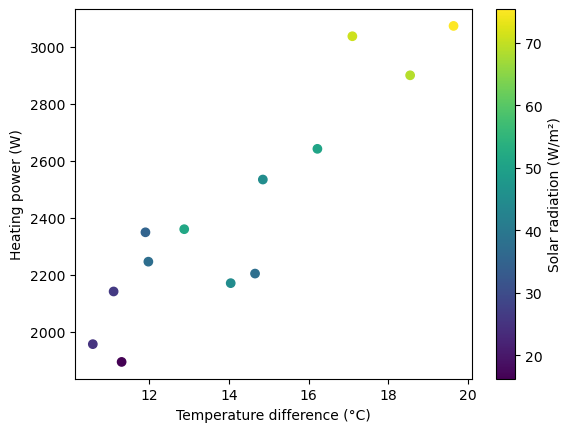

In [6]:
my_analysis.plot_data()

## before running a fit : a word on uncretainty management

The analysis can account for sensor calibration uncertainty and for indoor air temperature spatial uncertainty and applies the uncretainty calculation from Gori 2023.

Values by defaults are given to each measurand but this can be overridden.

In [7]:
# default
my_analysis.uncertainty_sensor_calibration

{'Ti': 0.1, 'Te': 0.1, 'Ph': 0.32, 'Isol': 1.95}

In [8]:
# default
my_analysis.uncertainty_spatial

{'Ti': 0.5}

## Let's try a multilinear regression

By default, a multilinear regression is performed and if the solar radiation coefficient is not significant, it runs a simple linear regression with a single exogeneous input.

Here, we'll force the multilinear fit without the model selection feature.

In [9]:
my_analysis.fit(method='multilinear')

In [10]:
my_analysis.summary

,multilinear
Coheating result,
HTC,176.691475
extended coverage interval,41.993411
2.5 % uncertainty bound,134.698064
97.5 % uncertainty bound,218.684886
error %,23.766518
method used,multilinear
AIC,179.426076
Isol was used,True
intercept,False


## Diagnostics

As stated by the NF EN 17887-2, a plot of the residuals must be shown in the report. Here, the residuals show clear signs of autocorrelation.

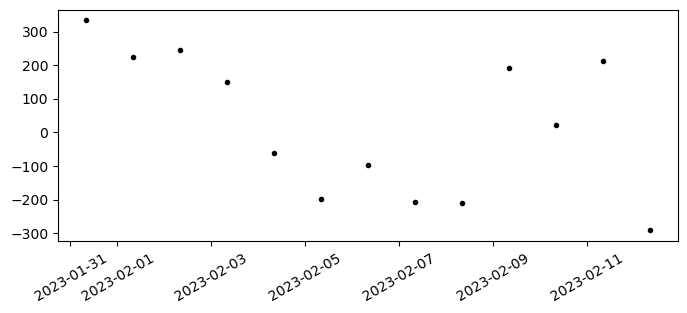

In [11]:
my_analysis.plot_residuals()

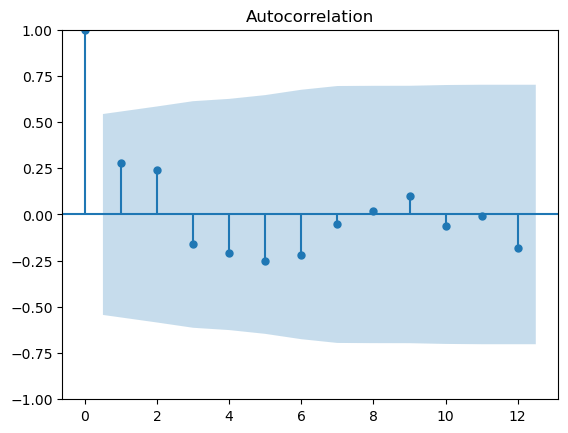

In [12]:
my_analysis.plot_autocorr_residuals()

In [13]:
my_analysis.shapiro_wilks_test()

The Shapiro-Wilks statistic is 0.911
With a p-value of 0.186, we can conclude that the normality hypothesis cannot be rejected. No assumption can be made on normality.


## A simple linear regression

In [20]:
# tiens, pourquoi ya des print qui sortent ???
my_analysis.fit(method='simple')

x1    163.028119
dtype: float64
x1    174.538755
dtype: float64
x1    167.474857
dtype: float64
x1    169.730067
dtype: float64
x1    168.616879
dtype: float64
x1    168.573579
dtype: float64


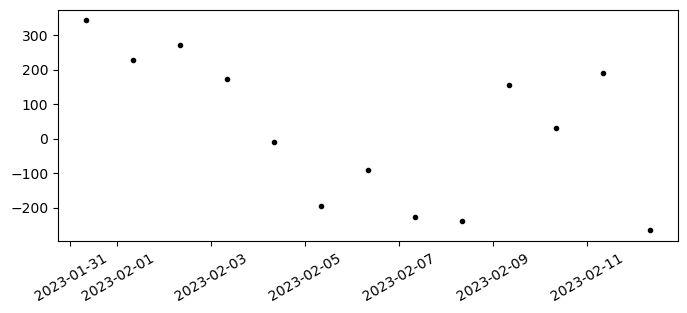

In [18]:
my_analysis.plot_residuals()

In [17]:
my_analysis.summary

,multilinear,simple
Coheating result,,
HTC,176.691475,168.595229
extended coverage interval,41.993411,14.3496
2.5 % uncertainty bound,134.698064,154.24563
97.5 % uncertainty bound,218.684886,182.944829
error %,23.766518,8.511273
method used,multilinear,simple
AIC,179.426076,177.608155
Isol was used,True,False
intercept,False,False


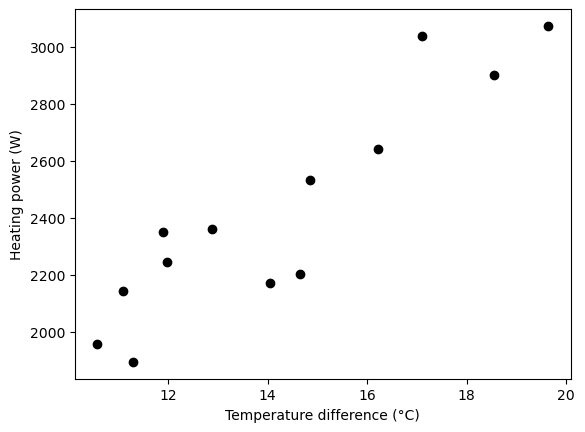

In [19]:
my_analysis.plot_data()